#                                Predictive Analytics

### Predictive Analytics Roadmap:
    
    It is based on Cross Industry Standard process for Data Mining (CRISP-DM)
    Predictive models need numbers, so we need to transfer categorical data into numerical.

    
### 6 stages in Road map:
  1)	Business Understanding – defining goal
  
  2)	Data Understanding – familiar with data, collect the right data, understanding types of data
  
  3)	Data Preparation – make sure data is able to process for modelling by dimensional reduction,  handling missing values,                             processing the outliers, applying normalization or standardization techniques and finally turning                              categorical data into numerical data if needed since most models take numerical data only
  
  4)	Modeling – divide the data into train and test, use training data to train the model, use test data for evaluate the                      model successful
  
  5)	Evaluation – testing to see if the model does the good job using test data. Some methods are there
  
  6)	Deployment – deploying the model

    

# ---------------------------------------------------------------------------------------------------------------

## 2.) Data Understanding



### Data Types:

2 types:
1) Numerical - 

             Interval - numerical data which cannot divide or numtiply with meaning. Eg. -2 degree              
             Ratio   - It can come in decimals and can measured in lenght, weight, area, cost.  Eg: 1200 Sq. feet 
             
   
2) Categorical  -

               Nominal - which cannot be compare whether less than or greater than. Eg: India, red               
               Ordinal - which can be compare whether less than or greater than.   Eg: Dr. No. #122
               
               


<img src="Files/images/Image-1.png"  width=600 />

### Main Libraries


***pandas*** - datastructures and data analysis

***NumPy*** - computing with array objects

***scikit-learn*** - preprocessing and prediction

***Matplotlib*** - plotting

***Seaborn*** - data visualization

In [33]:
############################################## PythonLibraries #####################################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


In [24]:
#import data
data = pd.read_csv("Files/Datasets/insurance.csv")

#see the first 15 lines of data
print(data.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# ---------------------------------------------------------------------------------------------------------------

## 3) Data Preperation

### Handling Missing values:

In real life, data is rarely complete.
It can contain NaN values.

There menthids to handle this:
    
1) Drop the column where NaN exists

2) Drop the row where NaN exists

3) Fill in the missing values 

In [6]:
# Dont Run
############################################01_03_HandlingMissingValues###################################################

#check how many values are missing (NaN) before we apply the methods below 
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

#fill in the missing values (we will look at 4 options for this course - there are so many other methods out there.)

#option0 for dropping the entire column
data1 = data.copy() # reloading fresh dataset for option 0
data1.drop('bmi', axis = 1, inplace = True)
#check how many values are missing (NaN) - after we dropped 'bmi'
count_nan = data1.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

#option1 for dropping NAN
data1 = data.copy() # reloading fresh dataset for option 1
data1.dropna(inplace=True)
data1.reset_index(drop=True, inplace=True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data1.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

#option2 for filling NaN # reloading fresh dataset for option 2
data1 = data.copy()
imputer = SimpleImputer(strategy='mean')
imputer.fit(data1['bmi'].values.reshape(-1, 1))
data1['bmi'] = imputer.transform(data['bmi'].values.reshape(-1, 1))
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data1.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

#option3 for filling NaN # reloading fresh dataset for option 3

data1['bmi'].fillna(data1['bmi'].mean(), inplace = True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data1.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

bmi    5
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


In [25]:
############################################01_03_HandlingMissingValues###################################################
#option3 for filling NaN # reloading fresh dataset for option 3

data['bmi'].fillna(data['bmi'].mean(), inplace = True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


### Data Visualization:

E:\Lambton College\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Lambton College\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Lambton College\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

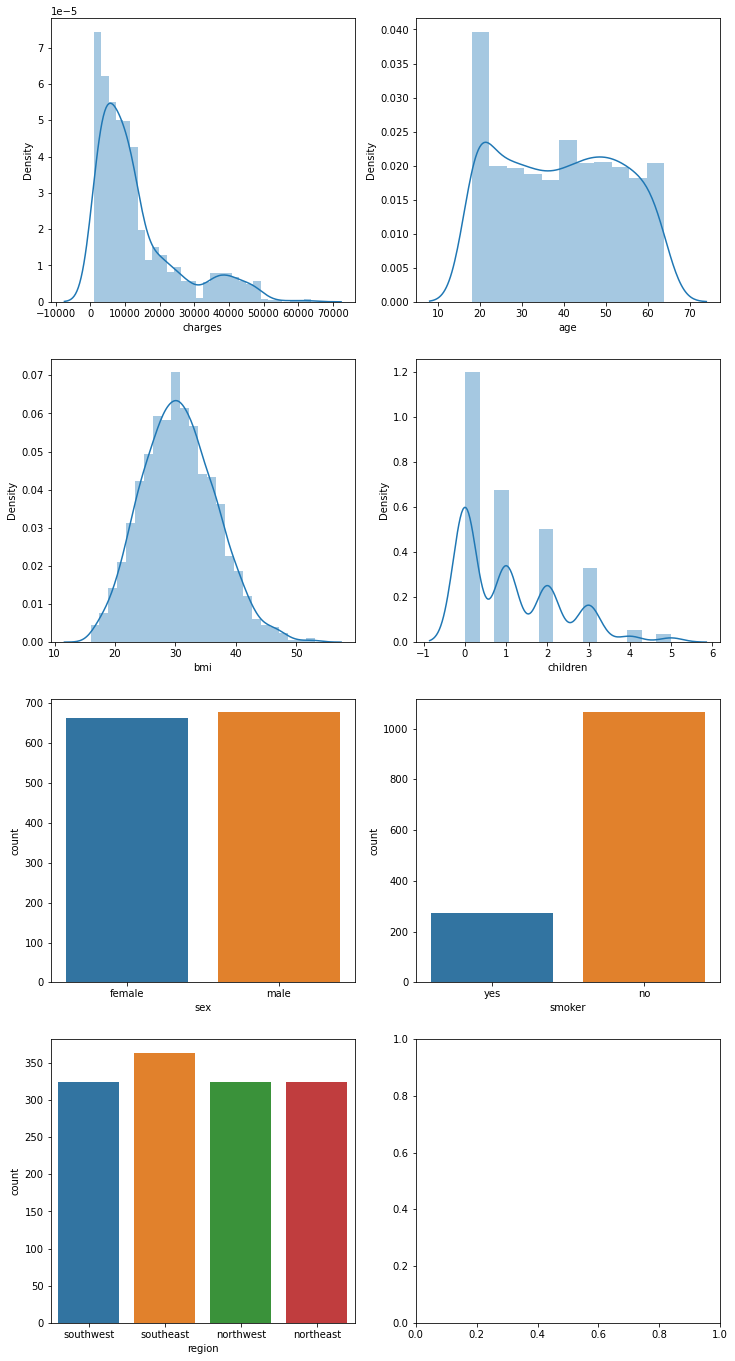

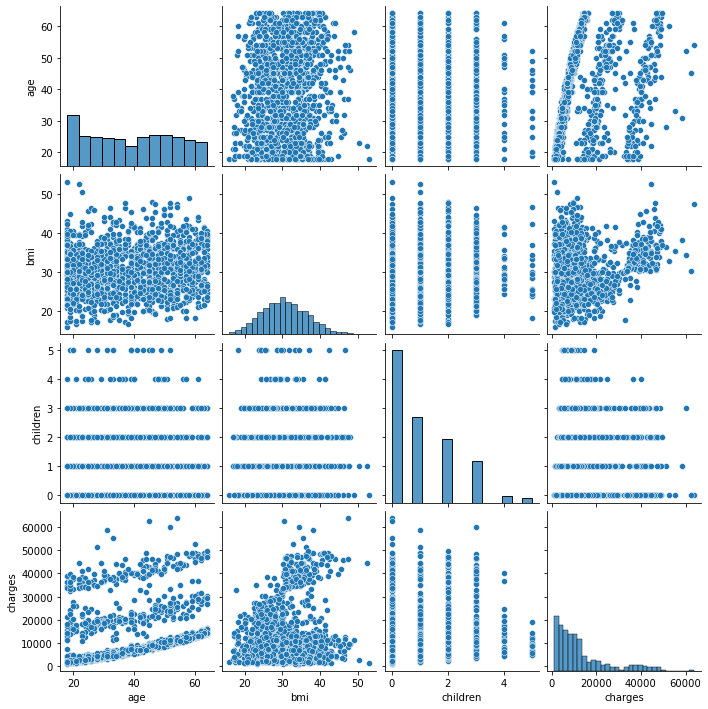

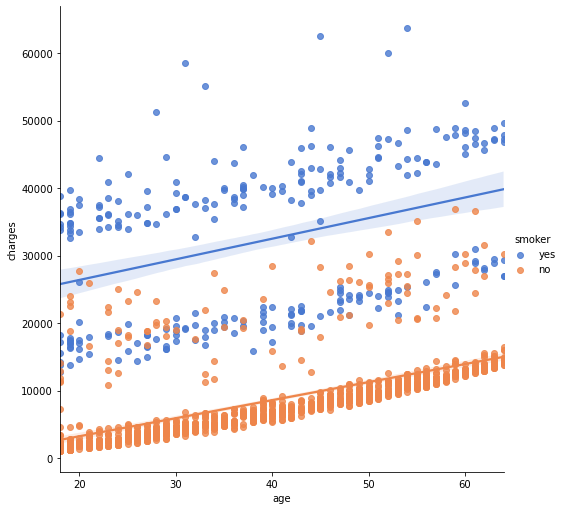

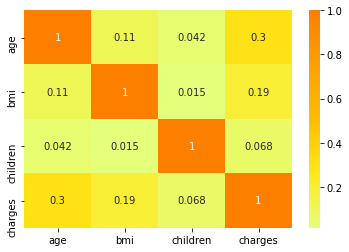

In [4]:
figure, ax = plt.subplots(4,2, figsize=(12,24))

#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])


sns.countplot(data['sex'],ax=ax[2,0])
sns.countplot(data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],ax= ax[3,0])



#visualizeing skewness
sns.pairplot(data)

#Lets look at smokers vs non-smokers on age vs charges:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height = 7)
plt.show(sns)

#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)


From the above graph we can see age and charges has good corelation. Also from corelation matrix we can see that age-charges has highest corelation which is 0.3

### Convert categorical Data into Number:

we need to convert categorical data into numbers because prediction models only numerical data.

2 ways: 

***Label encoding*** - two distinct values

***One hot encoding*** - three or more distinct values

<img src="Files/images/image-2.jpeg"  width=600 />
<img src="Files/images/image-3.jpeg"  width=600 />
<img src="Files/images/image-4.jpeg"  width=600 />

In [13]:
# Dont run
############################################01_04_ConvertCategoricalDataintoNumbers##############################################
#option0: pandas factorizing: maps each category to a different integer = label encoder 

#create series for pandas

region = data["region"] # series 
region_encoded, region_categories = pd.factorize(region)
factor_region_mapping = dict(zip(region_categories, region_encoded)) #mapping of encoded numbers and original categories. 

print("Pandas factorize function for label encoding with series")  
print(region[:10]) #original version 
print(region_categories) #list of categories
print(region_encoded[:10]) #encoded numbers for categories 
print(factor_region_mapping) # print factor mapping

#option1: pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder 

#create series for pandas
region = data["region"] # series 
region_encoded = pd.get_dummies(region, prefix='')

print("Pandas get_dummies function for one hot encoding with series")  

print(region[:10]) #original version 
print(region_encoded[:10]) #encoded numbers for categories 

#option2: sklearn label encoding: maps each category to a different integer

#create ndarray for label encodoing (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

#label encoder = le


## le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])

## le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

#option3: sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 

#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])


Pandas factorize function for label encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')
[0 1 1 2 2 1 1 2 3 2]
{'southwest': 0, 'southeast': 1, 'northwest': 1, 'northeast': 2}
Pandas get_dummies function for one hot encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
   _northeast  _northwest  _southeast  _southwest
0           0           0           0           1
1           0           0           1           0
2           0           0           1           0
3           0           1           0           0
4           0           1           0           0
5           0           0           1           0
6           0

In [26]:
############################################01_04_ConvertCategoricalDataintoNumbers##############################################

#option1: pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder 

#create series for pandas
region = data["region"] # series 
region_encoded = pd.get_dummies(region, prefix='')

print("Pandas get_dummies function for one hot encoding with series")  

print(region[:10]) #original version 
print(region_encoded[:10]) #encoded numbers for categories 

#option2: sklearn label encoding: maps each category to a different integer

#create ndarray for label encodoing (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

#label encoder = le


## le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])

## le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

#option3: sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 

#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])


Pandas get_dummies function for one hot encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
   _northeast  _northwest  _southeast  _southwest
0           0           0           0           1
1           0           0           1           0
2           0           0           1           0
3           0           1           0           0
4           0           1           0           0
5           0           0           1           0
6           0           0           1           0
7           0           1           0           0
8           1           0           0           0
9           0           1           0           0
Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0
Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1

### Test/Train Split

In [27]:
############################################01_05_DividingtheDataintoTestandTrain##############################################

#putting the data together:

##take the numerical data from the original data
X_num = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_num, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[['charges']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

### Feature Scaling:

We will apply methods so the models perform better.
normalization and standardization are commonly applied to x-axis variables.

<img src="Files/images/image-5.jpeg"  width=600 />

In [28]:
############################################01_06_FeatureScaling##############################################

###normalized scaler (fit transform on train, fit only on test)
#n_scaler = MinMaxScaler()
#X_train = n_scaler.fit_transform(X_train.astype(np.float))
#X_test= n_scaler.transform(X_test.astype(np.float))


#standard scaler (fit transform on train, fit only on test)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

<ipython-input-28-5ce1cccc7362>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-28-5ce1cccc7362>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= s_scaler.transform(X_test.astype(np.float))


# ---------------------------------------------------------------------------------------------------------------

## 4) Modeling

<img src="Files/images/image-6.jpeg"  width=600 />
<img src="Files/images/image-7.jpeg"  width=600 />
<img src="Files/images/image-8.jpeg"  width=600 />
<img src="Files/images/image-9.jpeg"  width=600 />

### Linear Regression:

<img src="Files/images/image-10.jpeg"  width=600 />
<img src="Files/images/image-11.jpeg"  width=600 />
<img src="Files/images/image-12.jpeg"  width=1000 />
<img src="Files/images/image-14.jpg"  width=600 />

In [20]:
############################################02_02_LinearRegression##############################################

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))


lr.coef_: [[3624.36356197 1966.90473927  661.35603447  242.57758422  -29.49212715
  -104.19142495  -99.14488063  -44.54996175 9310.54961689]]
lr.intercept_: [13141.35083164]
lr train score 0.728, lr test score: 0.786


### Ploynomial Regression:

<img src="Files/images/image-13.jpeg"  width=600 />
<img src="Files/images/image-15.jpeg"  width=1000 />

In [21]:
############################################02_03_PolynomialRegression##############################################

poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.828, poly test score: 0.869


<ipython-input-21-bc29db411d27>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
<ipython-input-21-bc29db411d27>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= sc.transform(X_test.astype(np.float))


### Support Vector regression

<img src="Files/images/image-16.jpeg"  width=600 />
<img src="Files/images/image-17.jpeg"  width=600 />
<img src="Files/images/image-18.jpeg"  width=600 />
<img src="Files/images/image-19.jpeg"  width=600 />
<img src="Files/images/image-20.jpeg"  width=600 />

In [29]:
############################################02_04_SupportVectorRegression##############################################

svr = SVR(kernel='linear', C = 300)

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))


svr train score 0.598, svr test score: 0.628


### Decision Tree:

This algorithm is more close to human thinking

<img src="Files/images/image-21.jpeg"  width=600 />
<img src="Files/images/image-22.jpeg"  width=600 />
<img src="Files/images/image-23.jpeg"  width=600 />

In [32]:
############################################02_05_DecisionTree##############################################

dt = DecisionTreeRegressor(random_state=0)

#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))


dt train score 0.999, dt test score: 0.701


Big problem is, this model is overfit 

### Random forest Regression:

It consists of multiple decision trees.
It is based on ensemble learning, which means multiple learning methods are working together as a team.

<img src="Files/images/image-24.jpeg"  width=600 />
<img src="Files/images/image-25.jpeg"  width=600 />
<img src="Files/images/image-26.jpeg"  width=600 />

In [34]:
############################################02_06_RandomForestRegression#######################################
forest = RandomForestRegressor(n_estimators = 100,   # number of trees
                              criterion = 'mse',     # default one - mean sqare error
                              random_state = 1,
                              n_jobs = -1)           # number of jobs to run

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.973, forest test score: 0.858


## 5) Evaluation